In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

imputer_train = SimpleImputer(strategy="median")
num_cols_train = train_df.select_dtypes(include=["int64", "float64"]).columns
train_df[num_cols_train] = imputer_train.fit_transform(train_df[num_cols_train])

#train_df = train_df.dropna()

imputer_test = SimpleImputer(strategy="median")
num_cols_test = test_df.select_dtypes(include=["int64", "float64"]).columns
test_df[num_cols_test] = imputer_test.fit_transform(test_df[num_cols_test])

#test_df = test_df.dropna()

print("Cleaned Training Data:")
print(train_df.head())

print("Cleaned Testing Data:")
print(test_df.head())

missing_values=train_df.isnull().sum().sum()
#print(missing_values)

missing_values=test_df.isnull().sum().sum()
#print(missing_values)

X_train = train_df[['Income (USD)', 'Loan Amount Request (USD)', 'Credit Score','Age']]
y_train = train_df['Loan Sanction Amount (USD)']

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred=model.predict(X_train)
mse_train=mean_squared_error(y_train, y_train_pred)
print(f"Trainng mse :{mse_train}")

# Calculate R-squared on the training data
train_r2 = model.score(X_train, y_train)

print(f'Training R-squared: {train_r2}')



Cleaned Training Data:
  Customer ID               Name Gender   Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F  56.0      1933.050              Low   
1     C-33999  America Calderone      M  32.0      4952.910              Low   
2      C-3770      Rosetta Verne      F  65.0       988.190             High   
3     C-26480         Zoe Chitty      F  65.0      2222.435             High   
4     C-23459       Afton Venema      F  31.0      2614.770              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of

Enter income: 5000
Enter loan amount request: 30000
Enter credit score: 700
Enter age: 35


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Loan Amount: [8951.81265746]


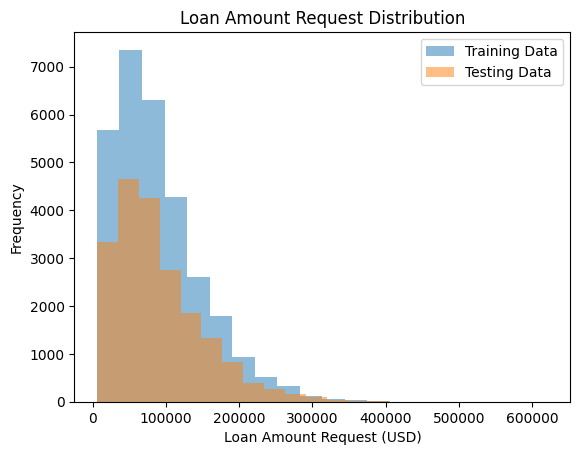

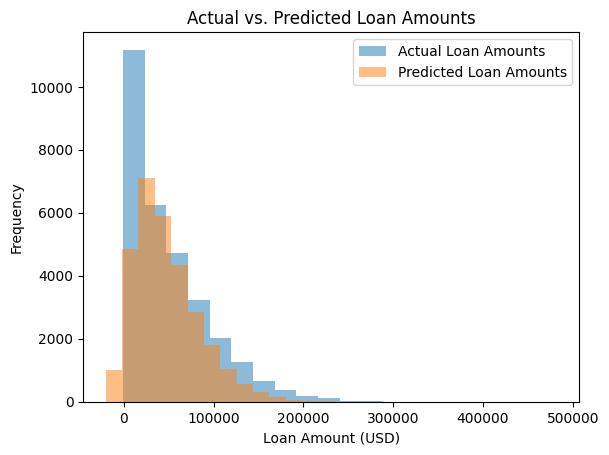

In [ ]:
income_usd = int(input("Enter income: "))
loan_amount_usd = int(input("Enter loan amount request: "))
credit_score = int(input("Enter credit score: "))
age = int(input("Enter age: "))

input_features = np.array([[income_usd, loan_amount_usd, credit_score, age]])

predicted_loan_amount = model.predict(input_features)
print(f"Predicted Loan Amount: {predicted_loan_amount}")

# Plotting feature vectors
# Plotting histograms for Income (USD) and Loan Amount Request (USD) for both training and testing datasets
plt.hist(train_df['Loan Amount Request (USD)'], bins=20, alpha=0.5, label='Training Data')
plt.hist(test_df['Loan Amount Request (USD)'], bins=20, alpha=0.5, label='Testing Data')
plt.xlabel('Loan Amount Request (USD)')
plt.ylabel('Frequency')
plt.title('Loan Amount Request Distribution')
plt.legend()
plt.show()

plt.hist(y_train, bins=20, alpha=0.5, label='Actual Loan Amounts')
plt.hist(y_train_pred, bins=20, alpha=0.5, label='Predicted Loan Amounts')
plt.xlabel('Loan Amount (USD)')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Loan Amounts')
plt.legend()
plt.show()